In [1]:
import tensorflow as tf
tf.__version__

2025-09-02 18:07:45.204764: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-02 18:07:46.491946: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.16.1'

In [2]:
tf.config.list_physical_devices('GPU')

2025-09-02 18:07:47.893124: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-02 18:07:48.165657: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-02 18:07:48.165744: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# MNIST data load

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape(-1, 28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# 합성곱 신경망의 구조

In [5]:
from tensorflow.keras import Sequential, layers
model = Sequential(
    [
    layers.Input(shape=(28,28,1)), #3차원 이미지 흑백 1장 , RGB 3장
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(), #default(2,2)
    layers.Dropout(0.1),
    
    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),#분류 계층
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') #출력 계층
    ]
)

2025-09-02 18:07:48.646183: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-02 18:07:48.646327: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-02 18:07:48.646389: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-02 18:07:48.948918: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-02 18:07:48.949014: I external/local_xla/xla/stream_executor

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 설정

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 모델 학습

In [8]:
model.fit(X_train,y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10


I0000 00:00:1756804071.344723   87860 service.cc:145] XLA service 0x78bea000aa60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756804071.344803   87860 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-09-02 18:07:51.395271: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-02 18:07:51.678103: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 35/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3348 - loss: 1.9360

I0000 00:00:1756804077.305503   87860 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8943 - loss: 0.3376
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9663 - loss: 0.1123
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9748 - loss: 0.0835
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9789 - loss: 0.0706
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9812 - loss: 0.0627
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9832 - loss: 0.0550
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9849 - loss: 0.0503
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9853 - loss: 0.0469
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9871 - loss: 0.0416
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0391


In [9]:
model.evaluate(X_test, y_test, verbose=0)

[0.023750757798552513, 0.9918000102043152]

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet') #첫 실행 시 가중치 다운로드 됨
img = image.load_img('YellowLabradorLooking_new.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x, verbose=0)

print('Predicted:', decode_predictions(pred, top=3)[0])


Predicted: [('n02091244', 'Ibizan_hound', 0.15838751), ('n02091831', 'Saluki', 0.106628865), ('n02099712', 'Labrador_retriever', 0.09648041)]


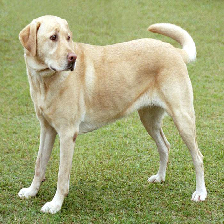

In [12]:
from tensorflow.keras.preprocessing import image
img = image.load_img('YellowLabradorLooking_new.jpg', target_size=(224, 224))
img

In [13]:
import numpy as np
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x, verbose=0)
print(decode_predictions(pred, top=3)[0])

[('n02091244', 'Ibizan_hound', 0.15838751), ('n02091831', 'Saluki', 0.106628865), ('n02099712', 'Labrador_retriever', 0.09648041)]


# 전이학습 : 출력층을 바꾼다
include_top=False   
마지막 출력층의 값을 3개로 설정한다.   

# 분류모델 추가하기

In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

res_model = ResNet50(weights='imagenet', input_shape=(128,128,3),include_top=False)
res_model.traiable = True
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │     1,048,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,636,419 (93.98 MB)

 Trainable params: 24,583,299 (93.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [16]:
import zipfile
file_path = 'glaucoma.zip'
with zipfile.ZipFile(file_path, 'r') as f:
    f.extractall('./datasets/')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.2, height_shift_range=0.2,
                               horizontal_flip=True)
train_data = train_gen.flow_from_directory('./datasets/glaucoma/train', target_size=(128,128),
                                           batch_size=32, class_mode='sparse')

test_gen = ImageDataGenerator()
test_data = test_gen.flow_from_directory('./datasets/glaucoma/test', target_size=(128,128),
                                         batch_size=32, class_mode='sparse')

Found 1394 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. 데이터 제너레이터
train_gen = ImageDataGenerator(
    rescale=1./255,                  # 반드시 정규화 추가!
    rotation_range=20,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    './datasets/glaucoma/train',
    target_size=(128,128),   # MobileNetV2 기본 입력은 224x224
    batch_size=32,
    class_mode='sparse'
)

test_data = test_gen.flow_from_directory(
    './datasets/glaucoma/test',
    target_size=(128,128),
    batch_size=32,
    class_mode='sparse'
)

# 2. MobileNetV2 불러오기 (기본 가중치 사용, 마지막 Dense 제거)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

# 3. 전이학습 구조 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

Found 1394 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',  # 정수 라벨이므로 sparse 사용
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,
    verbose=1
)

Epoch 1/20


: 

In [ ]:
# 테스트 데이터 로드
from tensorflow.keras.preprocessing import image

img = image.load_img('test.png', target_size=(224,224))
img

FileNotFoundError: [Errno 2] No such file or directory: 'test.png'